# ROB311 - Machine Learning for Robotics
## TP4: Support Vector Machine 
### Handwritten digits Recognitions

Mateus Lopes Ricci
Matheus Melo Monteverde

In [56]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing, neighbors, svm, decomposition
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib



## Reading the Data

In [57]:
# Read data file
df1 = pd.read_csv('datasets/mnist_train.csv')
df2 = pd.read_csv('datasets/mnist_test.csv')

# Separate data into input and output for both training and testing 
X_train = np.array(df1.drop(['label'],1))
y_train = np.array(df1['label'])

X_test = np.array(df2.drop(['label'],1))
y_test = np.array(df2['label'])

## Definition of the Model 

In [58]:
# Introducing PCA et SVM
pca = decomposition.PCA(whiten=True)
svc = svm.SVC()

# Introducing model
#model = make_pipeline(pca,svc)
model = Pipeline(steps=[('pca', pca), ('svm', svc)])


# Numbers of components after PCA
n_components = [10, 40]

## List of Parameters to analyze

In [59]:
# Parameters to analyse

params_grid = {
    'svm__C': [1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [0.001, 0.0005, 0.002],
    'pca__n_components': n_components,
}


## Grid of Model

In [9]:
# Grid of estimators
grid = GridSearchCV(model, params_grid)
grid.fit(X_train,y_train)



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svm__C': [1, 10, 100], 'svm__kernel': ['linear', 'rbf'], 'svm__gamma': [0.001, 0.0005, 0.002], 'pca__n_components': [10, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Determination of the best model Accurracy

In [60]:
# Calcul of  Accuracy
print(grid.best_params_, grid.best_score_)
print('train: ', grid.score(X_train,y_train)) 
accuracy = grid.score(X_test,y_test)
print('test: ', accuracy) 



{'pca__n_components': 40, 'svm__C': 100, 'svm__gamma': 0.002, 'svm__kernel': 'rbf'} 0.9751333333333333
train:  0.9912166666666666
test:  0.9803


## Saving Grid Results

In [78]:
# save gird results to '.cvs'
df3 = pd.DataFrame(grid.cv_results_)
df3.to_csv(r'.\\export_results.csv', index = False, header=True)

## Saving Grid Models Parameters

In [79]:
# save the model to disk
joblib.dump(grid.best_estimator_, 'export/model_best_estimator.pkl', compress = 1)
joblib.dump(grid, 'export/model_grid_object.pkl')

['model_grid_object.pkl']

## Loading Model

In [80]:
# Load Model
#filename = 'export/model_best_estimator.pkl'
loaded_model = joblib.load('export/model_best_estimator.pkl')
print(loaded_model.score(X_test,y_test))

loaded_grid = joblib.load('export/model_grid_object.pkl')
print(loaded_grid.best_params_, loaded_grid.best_score_)

0.9803
{'pca__n_components': 40, 'svm__C': 100, 'svm__gamma': 0.002, 'svm__kernel': 'rbf'} 0.9751333333333333


## Confusion Matrix

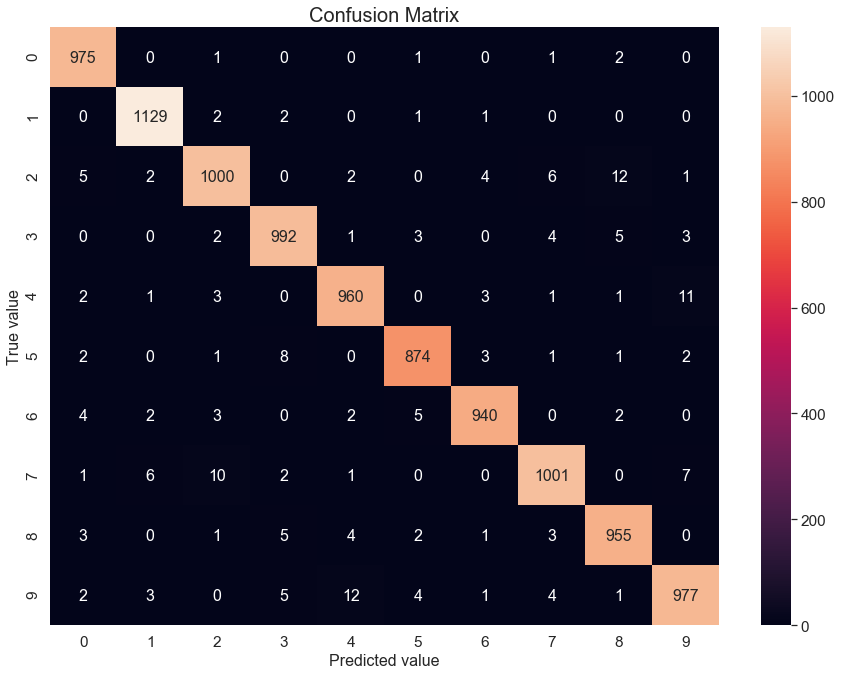

In [84]:
# Heatmap

# True value
y_true  = y_test

# Predicted Value
y_pred  = loaded_model.predict(X_test) 

# Confusion Matrix
disp = confusion_matrix(y_true, y_pred, labels = [0,1,2,3,4,5,6,7,8,9])
df_cm = pd.DataFrame(disp)

# Plot Confusion Matrix
plt.figure(figsize=(15,11))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted value', fontsize = 16) # x-axis label with fontsize 15
plt.ylabel('True value', fontsize = 16) # y-axis label with fontsize 15


plt.show()


## Accuracy Calcul for each digit

In [81]:

# Indices of each digit in the test dataframe
idx0 = df2.label == 0
idx1 = df2.label == 1
idx2 = df2.label == 2
idx3 = df2.label == 3
idx4 = df2.label == 4
idx5 = df2.label == 5
idx6 = df2.label == 6
idx7 = df2.label == 7
idx8 = df2.label == 8
idx9 = df2.label == 9

# Accuracy of each digit
acc0 = loaded_model.score(X_test[idx0],y_test[idx0])
acc1 = loaded_model.score(X_test[idx1],y_test[idx1])
acc2 = loaded_model.score(X_test[idx2],y_test[idx2])
acc3 = loaded_model.score(X_test[idx3],y_test[idx3])
acc4 = loaded_model.score(X_test[idx4],y_test[idx4])
acc5 = loaded_model.score(X_test[idx5],y_test[idx5])
acc6 = loaded_model.score(X_test[idx6],y_test[idx6])
acc7 = loaded_model.score(X_test[idx7],y_test[idx7])
acc8 = loaded_model.score(X_test[idx8],y_test[idx8])
acc9 = loaded_model.score(X_test[idx9],y_test[idx9])

# Print of accuracy digit
print('accuracy for 0: ',acc0)
print('accuracy for 1: ',acc1)
print('accuracy for 2: ',acc2)
print('accuracy for 3: ',acc3)
print('accuracy for 4: ',acc4)
print('accuracy for 5: ',acc5)
print('accuracy for 6: ',acc6)
print('accuracy for 7: ',acc7)
print('accuracy for 8: ',acc8)
print('accuracy for 9: ',acc9)


accuracy for 0:  0.9948979591836735
accuracy for 1:  0.9947136563876652
accuracy for 2:  0.9689922480620154
accuracy for 3:  0.9821782178217822
accuracy for 4:  0.9775967413441955
accuracy for 5:  0.9798206278026906
accuracy for 6:  0.9812108559498957
accuracy for 7:  0.9737354085603113
accuracy for 8:  0.9804928131416838
accuracy for 9:  0.9682854311199207
